In [ ]:
from scipy import ndimage
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw

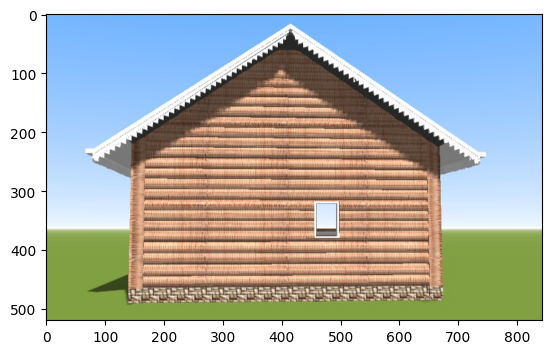

In [ ]:
stock_image = Image.open('Dom.jpg')
plt.imshow(stock_image)

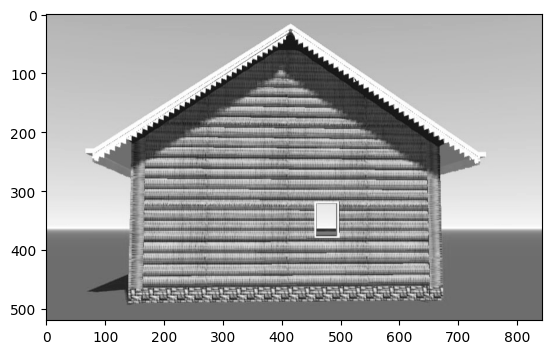

In [ ]:
pix = stock_image.load()
image_gr = np.array([[int((pix[x, y][0] + pix[x, y][1] + pix[x, y][2]) / 3) for x in range(stock_image.size[0])] for y in range(stock_image.size[1])])
plt.imshow(image_gr)

In [ ]:
Kx = np.array([[-1, 0, 1],
               [-1, 0, 1],
               [-1, 0, 1]], np.float32)

Ky = np.array([[0.1, 0.1, 0.1],
               [0, 0, 0],
               [-0.1, -0.1, -0.1]], np.float32)

In [ ]:
Ix = ndimage.convolve(image_gr, Kx)
Iy = ndimage.convolve(image_gr, Ky)

image_border = np.hypot(Ix, Iy)
plt.imshow(image_border, cmap='gray')

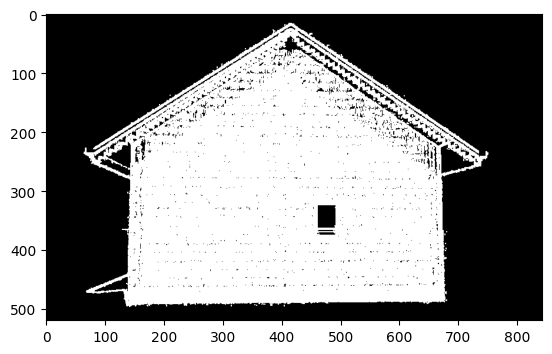

In [ ]:
image_mask = np.zeros(image_border.shape)
threshold  = 14.5

for x in range(image_border.shape[0]):
  for y in range(image_border.shape[1]):
    if image_border[x,y] > threshold:
      image_mask[x, y] = 1
      if x+1 < (image_border.shape[0]) and y+1 < (image_border.shape[1]):
      	image_mask[x+1,y+1] = 1

      if x+1 < (image_border.shape[0]):
      	image_mask[x+1, y] = 1

      if y+1 < (image_border.shape[1]):
      	image_mask[x, y+1] = 1

plt.imshow(image_mask, cmap='gray')

In [ ]:
image_new = Image.new(color=(0, 0, 0), size=(G.shape[1], image_border.shape[0]), mode='RGB')
dr = ImageDraw.Draw(image_new)

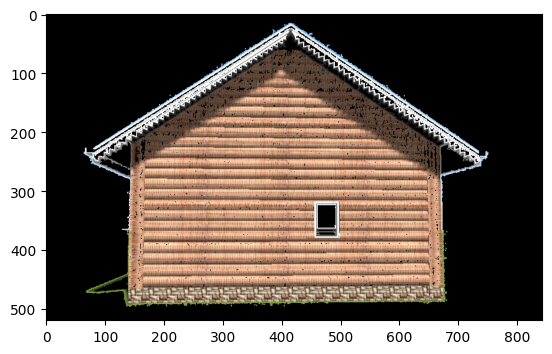

In [ ]:
w = np.asarray(stock_image)
for x in range(stock_image.size[1]):
  for y in range(stock_image.size[0]):
    if image_mask[x,y]:
      dr.point((y, x), (w[x,y,0], w[x,y,1], w[x,y,2]))

plt.imshow(image_new)